We will solve a 2D heat equation $u_t = 0.1(u_{xx} + u_{yy})$ on the square $[-1,1]\times[-1,1]$. We'll assume periodic behavior in both directions.

In [1]:
include("../FNC.jl")
m = 60;  x,Dx,Dxx = FNC.diffper(m,[-1,1]);
n = 40;  y,Dy,Dyy = FNC.diffper(n,[-1,1]);
X,Y = FNC.ndgrid(x,y);

Note that the initial condition must also be periodic on the domain. 

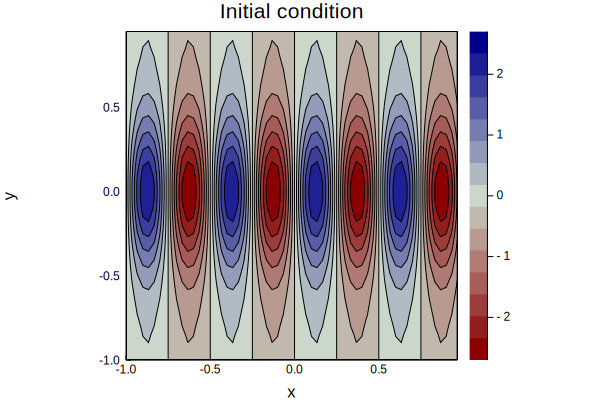

In [2]:
U0 = @. sin(4*pi*X)*exp(cos(pi*Y))

using Plots
contourf(x,y,U0,match_dimensions=true,color=:redsblues,aspect_ratio=1,
    xaxis=("x"),yaxis=("y"),title="Initial condition")    

The next two functions map between the natural matrix shape of the unknowns and the vector shape demanded by the ODE solvers. 

In [3]:
unpack(u) = reshape(u,m,n);
pack(U) = U[:];

This function computes the time derivative for the unknowns. The actual calculations take place using the matrix shape. 

In [4]:
dudt = function (u,nu,t)
    U = unpack(u);
    Uxx = Dxx*U;  Uyy = U*Dyy';     # 2nd partials
    dUdt = nu*(Uxx + Uyy);  # PDE
    return pack(dUdt);
end

#3 (generic function with 1 method)

Since this problem is parabolic, a stiff integrator is a good choice.

In [5]:
using DifferentialEquations
IVP = ODEProblem(dudt,pack(U0),(0,0.2),0.1)
sol = solve(IVP,Rodas4P());

Here we plot the solution at two different times. (The results are best viewed using an animation.)

In [6]:
an = @animate for t = range(0,stop=0.2,length=81)
    surface(x,y,unpack(sol(t)),match_dimensions=true,color=:redsblues,clims=(-2,2),
        xaxis=("x"),yaxis=("y"),title="Heat equation, t=$(round(t,digits=3))")
end 
gif(an,"heat2Dper.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/chapter13/heat2Dper.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/chapter13/heat2Dper.gif")